<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/hw02_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Homework 2 - Fruit Finder
### 2/26/2022
### *** Alex Lagarde ***

I would say things worked out okay in the end. I was able to correctly identify the total number of each fruit in the images. However, I did have trouble with area as my contours were wide at times, especially with the bananas. They were also small at times with the oranges and apples. Although there were only three images, I was able to prove that I could have generalized algorithm that can pick up specific types of fruit. The strength of my approach was the usage of dilation and opening morphological operations. Without those, I would have been completely lost with my approach as it helped me remove unwanted background pixels and expand foreground pixels. Although I tried really hard to have good color thresholds and good masks, my algorithm was weak at this aspect. My masks were not terrible as they got the job done, but they were not good. I could have found better thresholds, but I tried real hard to find them. When I used the morphological operations, I found that ellipses were a useful stucturing element shape. I was able to get some round edges on my shapes to resemble apples and oranges more. I used HSV color space, using hue and saturation, to select hue values in the range of the color I was primairly looking for along with saturation ranges to manage how much of a color shows. This was better than RGB in this scenario for me. Additionally, I found the parameters 24 to 32 for hue were best at finding the hue of bananas, 0 to 8 were best for finding the dark red hue of the apples, and 10 to 20 were best for finding the hue of oranges. These ranges made things easier for me in the end. 

In this lab I was limited to only using color thresholding for my color model and using color spaces RGB, HSV, and LAB. I could have used trained a neural network classifer instead. I was also limited to a beginner knowledge of morphological operations. If I had more time, I would spend more time learning about the operations and understanding what they exactly accomplish every time. I was mostly guessing and checking in this assignment. I would make sure I know what is exactly going on with more time. I would make better masks with the increased knowledge. On the whole, I made a solid effort on finding accurate thresholds. I made interactive widgets for every fruit in every image and spent hours thresholding. I displayed the initial masks, I used appropriate morphological operations such as opening, dilation, and closing. My code identifies the fruit accurately and displays the results, but the masks are a bit sloppy with some contours that are too wide. One mistake was caught with the yellow part of the orange being tied to the banana. The printing of numerical results are easy to read as I displayed them after the images to avoid mixing with the contours. I also addressed all aspects of the discussion. I mentioned how the results were okay, my strengths were around manuevering through the morphs, my weaknesses were around thresholding the three separate images at the same time, I used ellipses and HSV as special parameters, and I expressed desire to want to improve masks if i had more time. Ultimately, I feel like I deserve a complete full requirements except for the part about sloppy masks. I do not think my masks were mostly accurate, even though they correctly found the fruit.

In [ ]:
# import libraries
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import ipywidgets as widgets

mixed_fruit1.tiff


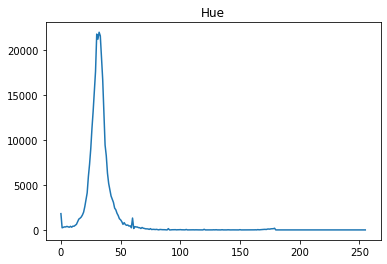

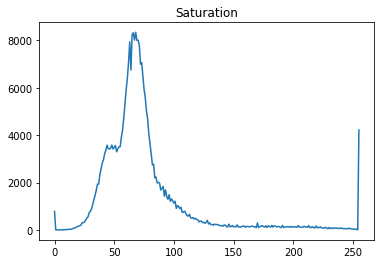


mixed_fruit2.tiff


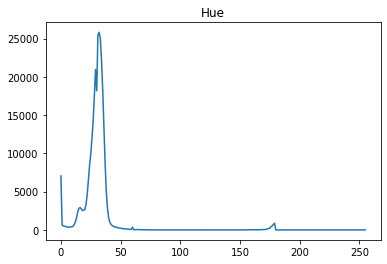

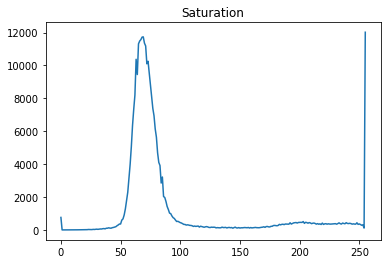


mixed_fruit3.tiff


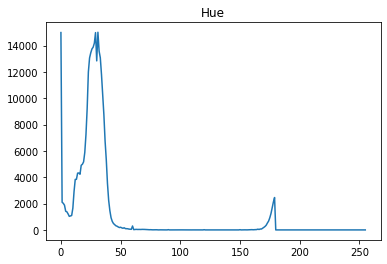

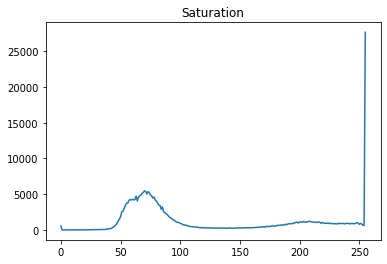

In [ ]:
image_files = ['mixed_fruit1.tiff',
               'mixed_fruit2.tiff',
               'mixed_fruit3.tiff']
def pixel_histograms(filename):
  img = cv2.imread(filename)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  H,S,V = cv2.split(hsv)
  hist = cv2.calcHist([H], [0], None, [256], [0, 256])
  plt.plot(hist)
  plt.title('Hue')
  plt.show()
  hist2 = cv2.calcHist([S], [0], None, [256], [0, 256])
  plt.plot(hist2)
  plt.title('Saturation')
  plt.show()

for file in image_files:
  print(file)
  pixel_histograms(file)
  print()

In [ ]:
# banana color detection by image using same thresholds across images
def color_thresholding(hsv_img, title):
  hsv = hsv_img
  low_H = widgets.FloatSlider(description='Low H',min=0,max=180,step=1,value=0)
  low_S = widgets.FloatSlider(description='Low S',min=0,max=255,step=1,value=0)
  low_V = widgets.FloatSlider(description='Low V',min=0,max=255,step=1,value=0)
  high_H = widgets.FloatSlider(description='High H',min=0,max=180,step=1,value=180)
  high_S = widgets.FloatSlider(description='High S',min=0,max=255,step=1,value=255)
  high_V = widgets.FloatSlider(description='High V',min=0,max=255,step=1,value=255)
  def b(low_H, high_H, low_S, high_S, low_V, high_V):
    thresh = cv2.inRange(hsv,(low_H, low_S,low_V),(high_H, high_S,high_V))
    plt.imshow(thresh,cmap='gray',vmin=0,vmax=255)
    plt.title(title)
    plt.show()
  out = widgets.interactive_output(b,
                                  {'low_H':low_H,'high_H':high_H,
                                  'low_S':low_S,'high_S':high_S,
                                  'low_V':low_V,'high_V':high_V})
  return widgets.HBox([widgets.VBox([low_H,high_H,low_S,high_S,low_V,high_V]),out]) 



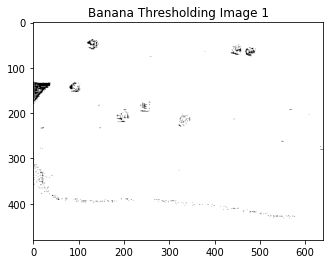

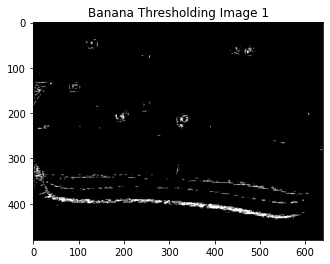

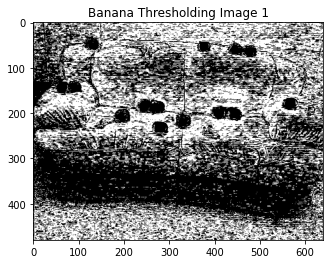

In [ ]:
def read2hsv(filename):
  img = cv2.imread(filename)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  return hsv
num = 0
for file in image_files:
  num+=1
  display(color_thresholding(read2hsv(file), 'Banana Thresholding Image {}'.format(num)))

In [ ]:
# apple color detection by image using same thresholds across images
num = 0
for file in image_files:
  num+=1
  display(color_thresholding(read2hsv(file), 'Apple Thresholding Image {}'.format(num)))

In [ ]:
# orange color detection by image using same thresholds across images
num = 0
for file in image_files:
  num+=1
  display(color_thresholding(read2hsv(file), 'Orange Thresholding Image {}'.format(num)))

In [ ]:
def apple_morph(mask):
  strel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
  strel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (31,31))
  strel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
  strel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (14,14))
  open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, strel)
  close = cv2.morphologyEx(open, cv2.MORPH_CLOSE, strel2)
  open2 = cv2.morphologyEx(close, cv2.MORPH_OPEN, strel3)
  dilate = cv2.morphologyEx(open2, cv2.MORPH_DILATE, strel4)
  return dilate
def orange_morph(mask):
  strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
  strel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17,17))
  open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, strel)
  dilate = cv2.morphologyEx(open, cv2.MORPH_DILATE, strel2)
  return dilate
def banana_morph(mask):
  strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
  strel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25,25))
  strel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (23,23)) 
  strel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (47,47))
  strel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (30,30))
  open = cv2.morphologyEx(mask, cv2.MORPH_OPEN, strel)
  dilate = cv2.morphologyEx(open, cv2.MORPH_DILATE, strel2)
  erode = cv2.morphologyEx(dilate, cv2.MORPH_ERODE, strel3)
  dilate2 = cv2.morphologyEx(erode, cv2.MORPH_DILATE, strel4)
  open2 = cv2.morphologyEx(dilate2, cv2.MORPH_OPEN, strel5)
  return open2
def find_contours(morphed_img):
  # contours
  contours, _ = cv2.findContours(morphed_img.copy(),
  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  return contours
def create_contours(morphed, contours):
  count = 0
  area = 0
  coordinates_dict = {}
  area_list = []
  for i, c in enumerate(contours):
    count+=1
    x, y, w, h = cv2.boundingRect(c)
    cv2.drawContours(morphed, [c], -1, (255,0,0), 4)
    cX = x + (w//2)
    cY = y + (h//2)
    area = cv2.contourArea(c)
    area_list.append(area)
    coordinates_dict.update({cX:cY})
  return morphed, count, coordinates_dict, area_list
  

In [ ]:
def final_results(img_name):
  img = cv2.imread(img_name)
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  banana_mask = cv2.inRange(hsv,(24,170,0),(32,255,255))
  apple_mask = cv2.inRange(hsv,(0,174,0),(8,255,255))
  orange_mask = cv2.inRange(hsv,(10,180,0),(20,255,255))
  plt.imshow(apple_mask, cmap = 'gray')
  plt.title('Apple Mask')
  plt.show()
  plt.imshow(orange_mask, cmap = 'gray')
  plt.title('Orange Mask')
  plt.show() 
  plt.imshow(banana_mask, cmap = 'gray')
  plt.title('Banana Mask')
  plt.show()
  apple_morphed = apple_morph(apple_mask)
  orange_morphed = orange_morph(orange_mask)
  banana_morphed = banana_morph(banana_mask)
  plt.imshow(apple_morphed, cmap = 'gray')
  plt.title('Apple Morphed')
  plt.show()
  plt.imshow(orange_morphed, cmap = 'gray')
  plt.title('Orange Morphed')
  plt.show()
  plt.imshow(banana_morphed,cmap='gray')
  plt.title('Banana Morphed')
  plt.show()
  contours1 = find_contours(apple_morphed)
  contours2 = find_contours(orange_morphed)
  contours3 = find_contours(banana_morphed)
  apple_contours = create_contours(img.copy(), contours1)
  orange_contours = create_contours(img.copy(), contours2)
  banana_contours = create_contours(img.copy(), contours3)
  apple_contoursRGB = cv2.cvtColor(apple_contours[0], cv2.COLOR_BGR2RGB)
  orange_contoursRGB = cv2.cvtColor(orange_contours[0], cv2.COLOR_BGR2RGB)
  banana_contoursRGB = cv2.cvtColor(banana_contours[0], cv2.COLOR_BGR2RGB)
  plt.imshow(apple_contoursRGB, cmap = 'gray')
  plt.title('Apple with Contours')
  plt.show()
  plt.imshow(orange_contoursRGB, cmap = 'gray')
  plt.title('Orange with Contours')
  plt.show()
  plt.imshow(banana_contoursRGB,cmap='gray')
  plt.title('Banana with Contours')
  plt.show()
  print('Number of Apples:', apple_contours[1])
  print('XY center coordinates of Apples:', apple_contours[2])
  print('Area of Apples:', apple_contours[3])  
  print('Number of Oranges:', orange_contours[1])
  print('XY center coordinates of Oranges', orange_contours[2])
  print('Area of Oranges:', orange_contours[3])  
  print('Number of Bananas:', banana_contours[1])
  print('XY center coordinates of Bananas', banana_contours[2])
  print('Area of Bananas:', banana_contours[3])  
  print('')
  return 'end'

mixed_fruit1.tiff results...


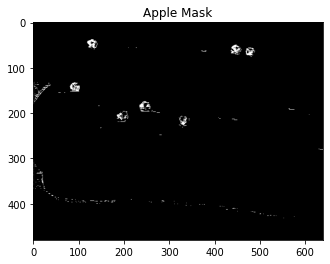

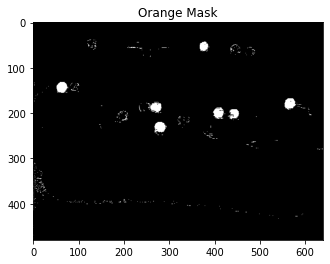

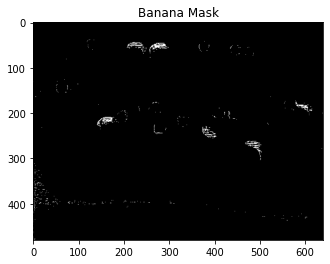

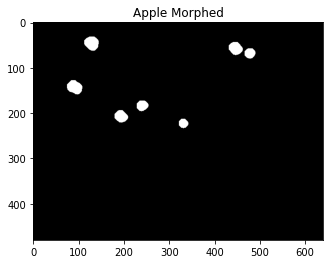

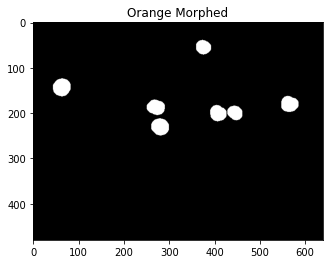

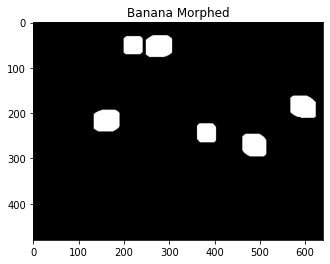

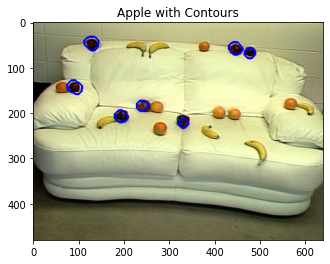

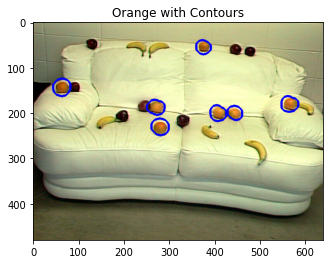

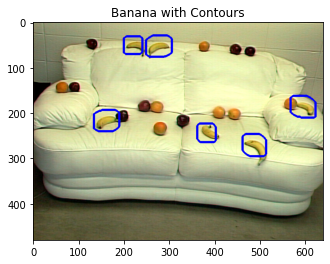

Number of Apples: 7
XY center coordinates of Apples: {332: 223, 195: 208, 242: 185, 92: 144, 479: 69, 447: 58, 129: 48}
Area of Apples: [312.5, 568.5, 442.0, 741.5, 400.5, 629.0, 730.5]
Number of Oranges: 7
XY center coordinates of Oranges {280: 231, 445: 200, 409: 200, 271: 187, 567: 180, 63: 144, 376: 55}
Area of Oranges: [1113.0, 787.5, 968.0, 1002.0, 1024.0, 1166.5, 787.5]
Number of Bananas: 6
XY center coordinates of Bananas {488: 271, 383: 244, 162: 217, 596: 186, 221: 51, 278: 53}
Area of Bananas: [2348.5, 1614.5, 2437.5, 2397.0, 1554.5, 2489.5]

end

mixed_fruit2.tiff results...


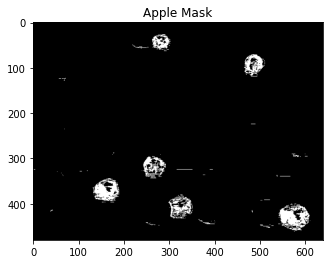

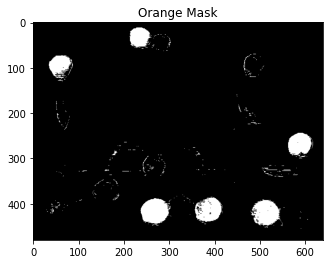

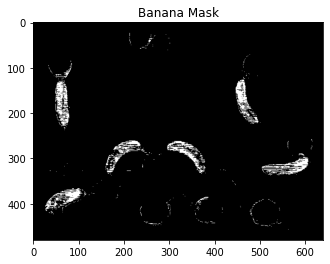

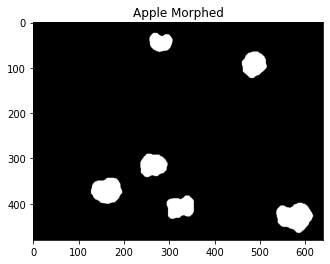

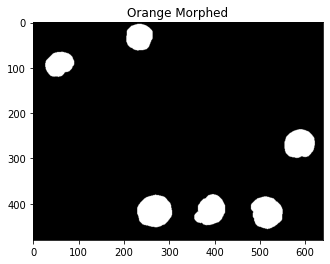

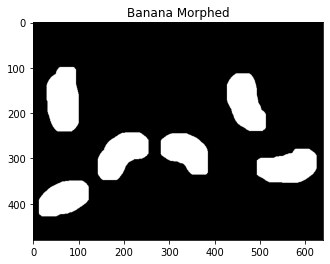

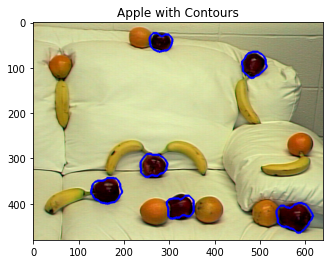

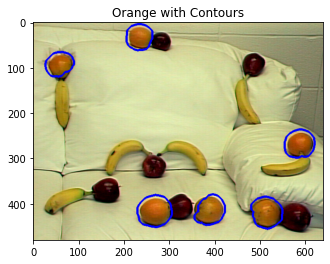

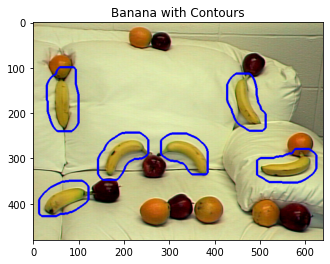

Number of Apples: 6
XY center coordinates of Apples: {577: 431, 325: 408, 162: 372, 267: 316, 488: 94, 282: 45}
Area of Apples: [3635.5, 2316.0, 2911.5, 2334.0, 2279.5, 1574.5]
Number of Oranges: 6
XY center coordinates of Oranges {516: 420, 268: 416, 390: 413, 588: 268, 59: 93, 235: 33}
Area of Oranges: [3733.5, 4208.5, 3286.0, 3320.0, 2571.0, 2673.5]
Number of Bananas: 6
XY center coordinates of Bananas {68: 388, 560: 316, 334: 290, 199: 295, 471: 176, 65: 170}
Area of Bananas: [6556.5, 7490.0, 6716.5, 7654.0, 7698.0, 8443.0]

end

mixed_fruit3.tiff results...


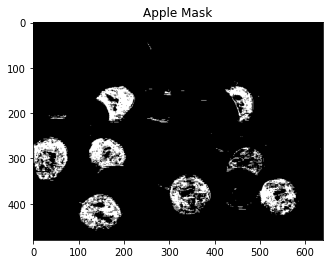

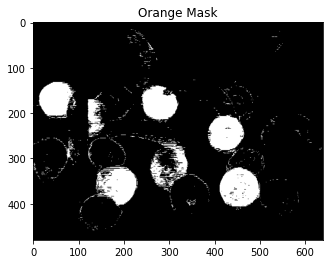

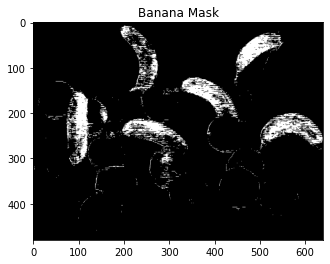

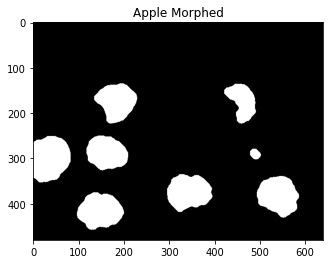

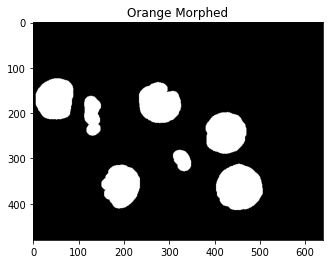

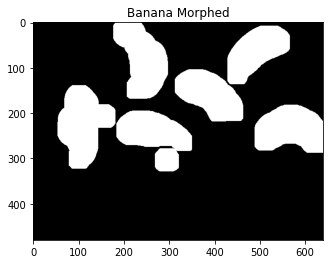

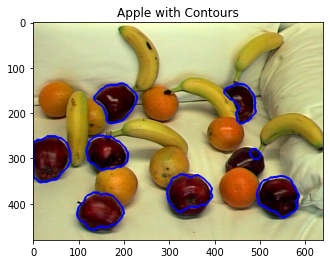

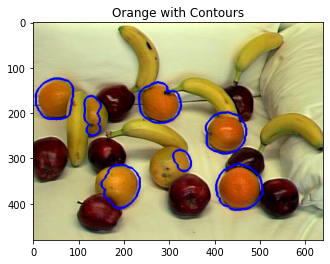

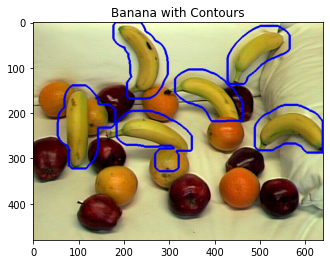

Number of Apples: 8
XY center coordinates of Apples: {149: 416, 540: 385, 346: 377, 491: 291, 41: 302, 164: 288, 457: 180, 182: 179}
Area of Apples: [6055.5, 6005.0, 6047.5, 392.5, 6806.5, 5250.5, 3603.5, 5467.0]
Number of Oranges: 7
XY center coordinates of Oranges {193: 362, 455: 363, 329: 305, 426: 244, 131: 206, 280: 177, 47: 169}
Area of Oranges: [5930.0, 7968.5, 1331.5, 6467.5, 2472.5, 6287.5, 6056.0]
Number of Bananas: 6
XY center coordinates of Bananas {267: 262, 564: 235, 118: 231, 388: 161, 498: 72, 237: 84}
Area of Bananas: [13146.5, 12504.0, 14864.5, 11474.0, 10880.5, 13274.5]

end



In [ ]:
for file in image_files:
  print('{} results...'.format(file))
  print(final_results(file))
  print('')
